Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


here we are reading csv file and loadind data into dataframe

In [2]:
data=pd.read_csv('water level.csv')
data

,DATE,WATER_LEVEL
0,19/7/24,11.0
1,20/7/24,15.0
2,21/7/24,17.0
3,22/7/24,27.0
4,23/7/24,NaN
5,24/7/24,30.0
6,25/7/24,32.0
7,25/7/24,33.0
8,26/7/24,37.0
9,27/7/24,40.0


Here we are looking for any missing vaule.

In [3]:
data.isnull().sum()

DATE           0
WATER_LEVEL    1
dtype: int64

handling missing value using interpoliation and mean and comare which is best fit oprtion.

In [6]:
data1=data.fillna(data.interpolate())
data1

,DATE,WATER_LEVEL
0,19/7/24,11.0
1,20/7/24,15.0
2,21/7/24,17.0
3,22/7/24,27.0
4,23/7/24,28.5
5,24/7/24,30.0
6,25/7/24,32.0
7,25/7/24,33.0
8,26/7/24,37.0
9,27/7/24,40.0


In [7]:
data2=data.fillna(data.mean())
data2

TypeError: Could not convert ['19/7/2420/7/2421/7/2422/7/2423/7/2424/7/2425/7/2425/7/2426/7/2427/7/24'] to numeric

In [ ]:
data2.isnull().sum()

In [17]:
data1.describe()

,WATER_LEVEL
count,9.000000
mean,25.611111
std,9.047713
min,11.000000
25%,17.000000
50%,28.500000
75%,32.000000
max,37.000000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         10 non-null     object 
 1   WATER_LEVEL  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


here date column is object type, need to covert it into datetime format.

In [10]:
data1['DATE']=pd.to_datetime(data['DATE'])
data1

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_3804\801812402.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['DATE']=pd.to_datetime(data['DATE'])


,DATE,WATER_LEVEL
0,2024-07-19,11.0
1,2024-07-20,15.0
2,2024-07-21,17.0
3,2024-07-22,27.0
4,2024-07-23,28.5
5,2024-07-24,30.0
6,2024-07-25,32.0
7,2024-07-25,33.0
8,2024-07-26,37.0
9,2024-07-27,40.0


let verify if conversion is successful.

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         10 non-null     datetime64[ns]
 1   WATER_LEVEL  10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 292.0 bytes


Here we are defining X and Y variables. X is for dates and Y is for water level

In [14]:
# Define features (X) and target (y)
X = data1[['DATE']]
y = data1['WATER_LEVEL']

now lets dive into traing and testing part, 
we need to splite the data into traing and testing datasets.
80% of the data will be used for training.
20% of the data will be used for testing.

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now here onwards actual process starts. starting with initializing and training the model. 
calculating mean error and finaly obtain requred results from trainined model.

In [17]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Mean Absolute Error: 0.431318681454286


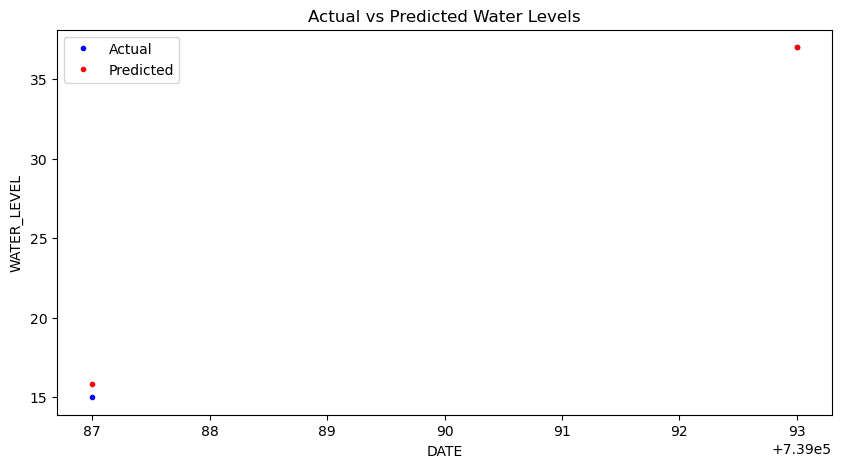

In [21]:
# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(X_test, y_test, 'b.', label='Actual')

plt.plot(X_test, y_pred, 'r.', label='Predicted')
plt.xlabel('DATE')
plt.ylabel('WATER_LEVEL')
plt.title('Actual vs Predicted Water Levels')
plt.legend()
plt.show()


In [28]:
# Predicting water levels for the next 3-4 days
last_day = data1['DATE'].max()
future_dates = np.array([last_day + i for i in range(1, 5)]).reshape(-1, 1)
future_predictions = model.predict(future_days)

#Display the predictions
future_dates = [pd.Timestamp.fromordinal(day) for day in future_days.flatten()]
print("\nFuture Predictions:")
for date, level in zip(future_dates, future_predictions):
    print(f"DATE: {date}, Predicted Water Level: {level}")



Future Predictions:
DATE: 2024-07-28 00:00:00, Predicted Water Level: 44.054945055395365
DATE: 2024-07-29 00:00:00, Predicted Water Level: 47.57967033004388
DATE: 2024-07-30 00:00:00, Predicted Water Level: 51.1043956046924
DATE: 2024-07-31 00:00:00, Predicted Water Level: 54.62912087934092


C:\Users\Vinayak\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Here we are creating a dataframe from obtained results. just to display results properly.

In [35]:
data=pd.DataFrame({'Future Dates':future_dates, 'Predicted Water Level':future_predictions})
data

,Future Dates,Predicted Water Level
0,2024-07-28,44.054945
1,2024-07-29,47.579670
2,2024-07-30,51.104396
3,2024-07-31,54.629121


here we are exporting results into CSV file.

In [36]:
data.to_csv('test.csv')